In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


TRAIN DATA

In [245]:
train_data=pd.read_csv('/content/train_ctrUa4K.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [246]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [247]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [248]:
train_data.shape

(614, 13)

MISSING VALUES

In [249]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

FILLING MISSING VALUE

In [250]:
train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())
train_data['Credit_History']=train_data['Credit_History'].fillna(train_data['Credit_History'].median())

In [251]:
train_data['Gender'] = train_data['Gender'].fillna(method='ffill')
train_data['Married'] = train_data['Married'].fillna(method='ffill')
train_data['Dependents'] = train_data['Dependents'].fillna(method='ffill')
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(method='ffill')

In [252]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

TEST DATA

In [253]:
test_data=pd.read_csv('/content/test_lAUu6dG (1).csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [254]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [255]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [256]:
test_data.shape

(367, 12)

MISSING VALUES

In [257]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

FILLING MISSING VALUES

In [258]:
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median())
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].median())

In [259]:
test_data['Gender'] = test_data['Gender'].fillna(method='ffill')
test_data['Married'] = test_data['Married'].fillna(method='ffill')
test_data['Dependents'] = test_data['Dependents'].fillna(method='ffill')
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(method='ffill')

In [260]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**FINDING RELATION**

<Axes: >

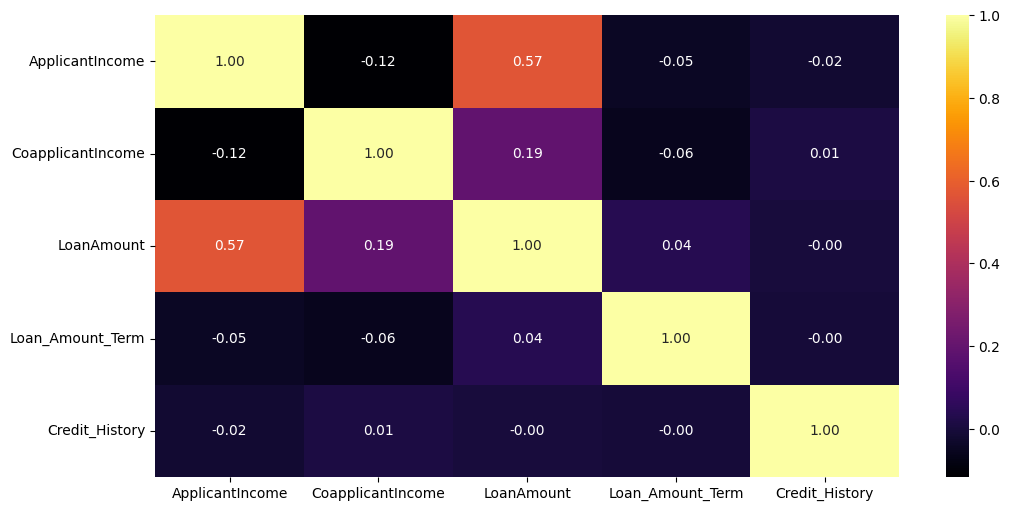

In [261]:
num_train_data = train_data.select_dtypes(include=['number'])
plt.figure(figsize = (12,6))
sns.heatmap(num_train_data.corr(),cmap='inferno', annot=True, fmt='.2f')

In [262]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
train_data['Loan_Status'] = lab.fit_transform(train_data['Loan_Status'])


In [263]:
train_data['Loan_Status'].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

<Axes: >

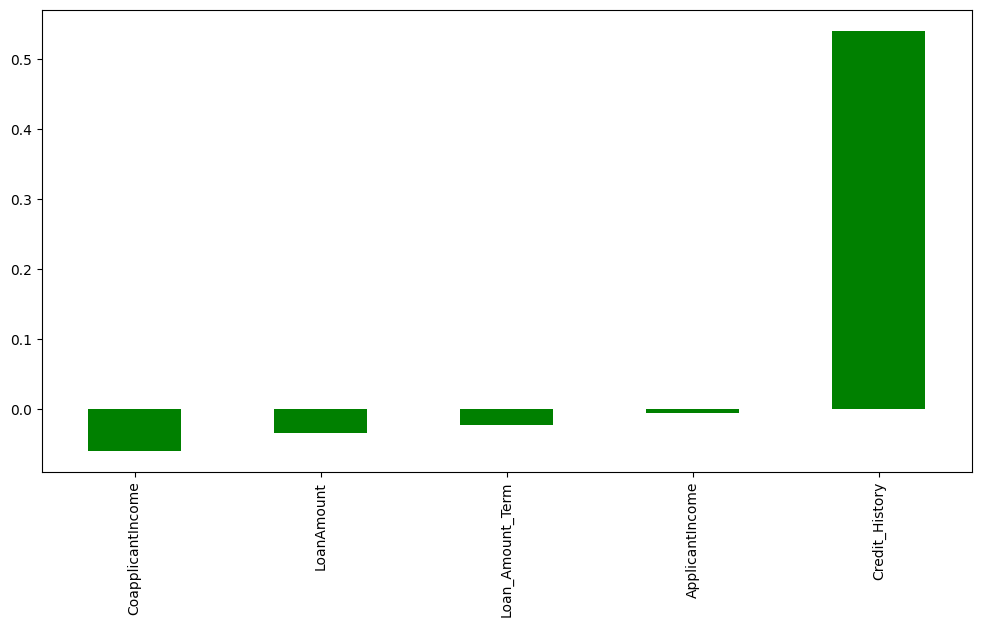

In [264]:
num_train_data = train_data.select_dtypes(include=['number'])
plt.figure(figsize = (12,6))
num_train_data.corr()['Loan_Status'][:-1].sort_values().plot(kind = 'bar', cmap = 'plasma',color='green')


**EDA**

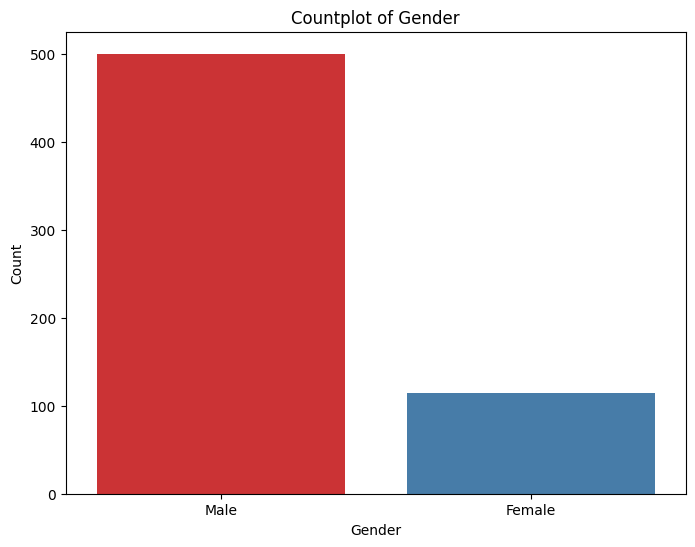

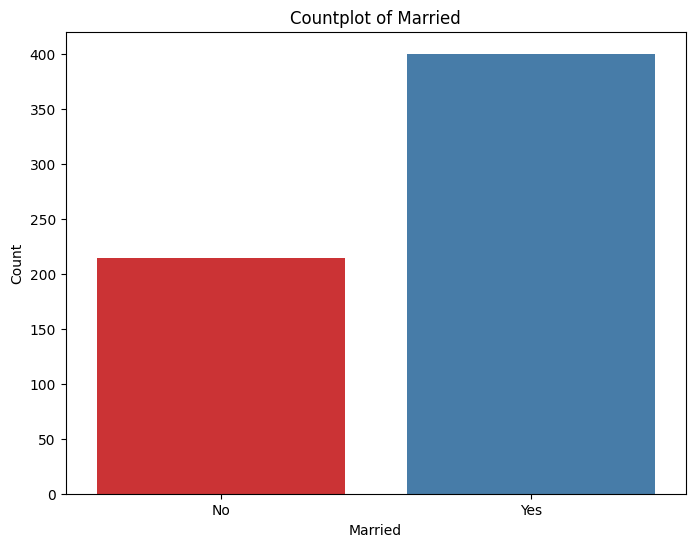

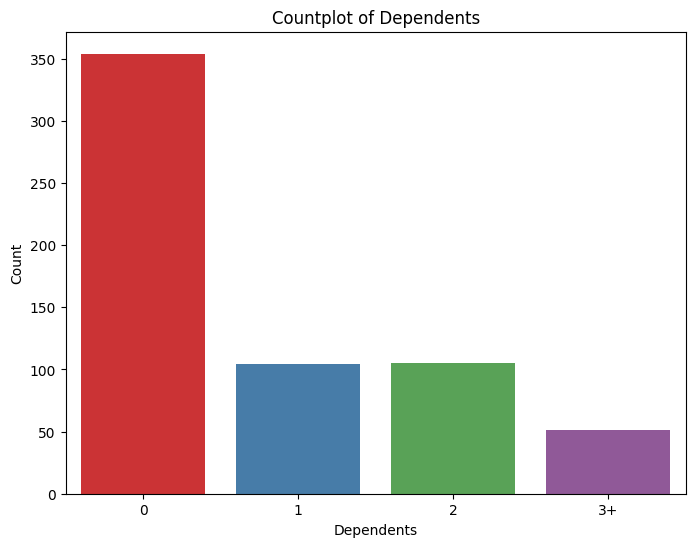

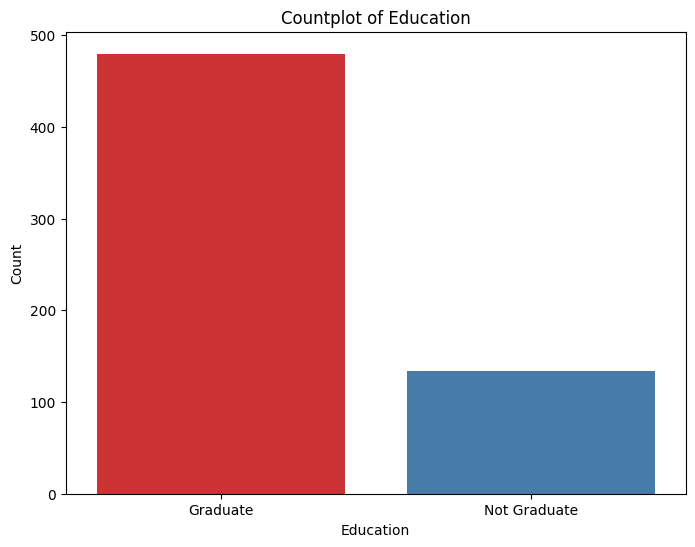

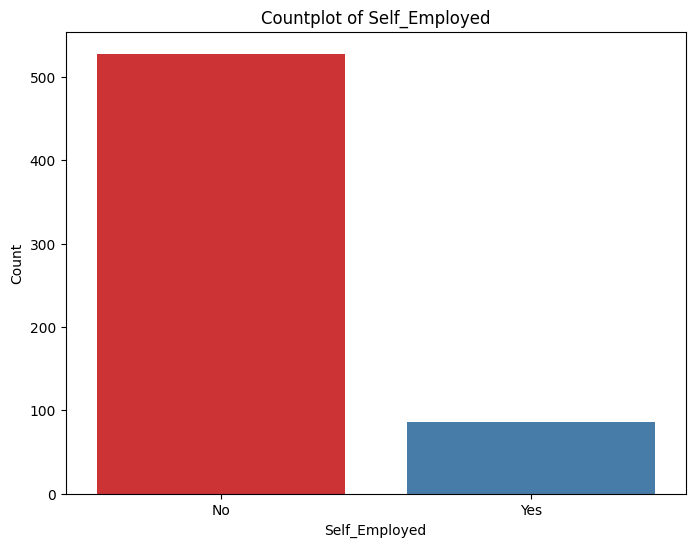

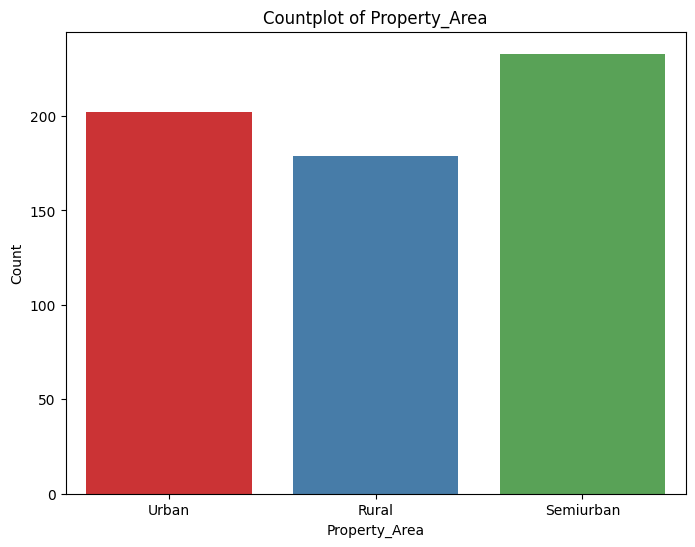

In [265]:
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for val in cols:
  plt.figure(figsize=(8,6))
  sns.countplot(data=train_data,x=val,palette='Set1')
  plt.title(f'Countplot of {val}')
  plt.ylabel('Count')
  plt.xlabel(val)
  plt.show()

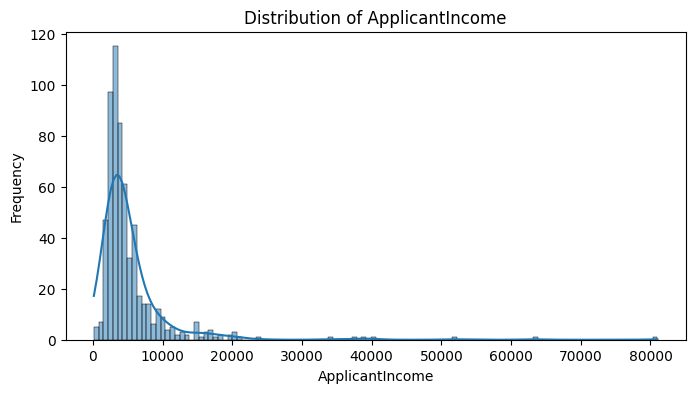

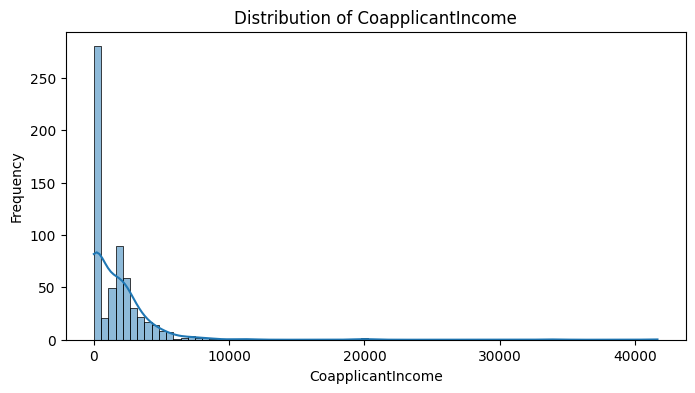

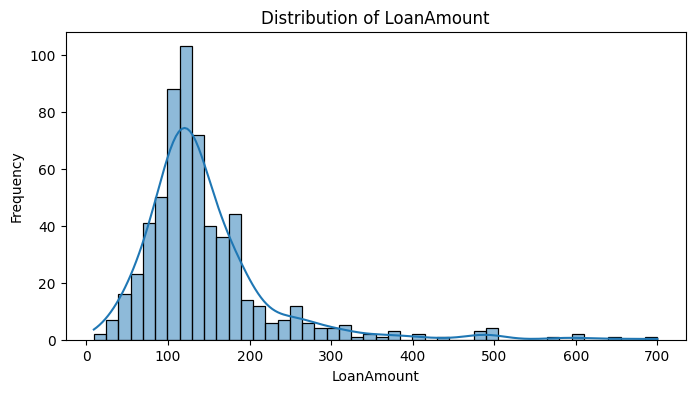

In [266]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for column in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Loan_ID to str

In [267]:
train_data['Loan_ID'] = train_data['Loan_ID'].str.replace('LP00', '')
test_data['Loan_ID'] = test_data['Loan_ID'].str.replace('LP00', '')

Loan_Amount_Term and Dependants needs to be integer

In [268]:
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].astype('int64')
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].astype('int64')


 Removing the '+' sign from Dependents column

In [271]:
# Removing the '+' sign from Dependents column
train_data['Dependents'] = train_data['Dependents'].str.rstrip('+')
test_data['Dependents'] = test_data['Dependents'].str.rstrip('+')

In [272]:
train_data['Dependents'] = train_data['Dependents'].astype('int64')
test_data['Dependents'] = test_data['Dependents'].astype('int64')

In [274]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 62.5+ KB


In [275]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 62.5+ KB


IMPUING VALUES

In [276]:
train_data['Gender'] = train_data['Gender'].map({'Male': 1, 'Female': 0})
train_data['Married'] = train_data['Married'].map({'No' : 0, 'Yes': 1})
train_data['Education'] = train_data['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
train_data['Self_Employed'] = train_data['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [277]:
test_data['Gender'] = test_data['Gender'].map({'Male': 1, 'Female': 0})
test_data['Married'] = test_data['Married'].map({'No' : 0, 'Yes': 1})
test_data['Education'] = test_data['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
test_data['Self_Employed'] = test_data['Self_Employed'].map({'No' : 0, 'Yes' : 1})

**dummy** **variables** **for** **Property** **column**

In [278]:
property_area = pd.get_dummies(train_data['Property_Area'], prefix='Property_Area')
train_data = pd.concat([train_data, property_area], axis = 1)
train_data = train_data.drop('Property_Area', axis = 1)

property_area = pd.get_dummies(test_data['Property_Area'], prefix='Property_Area')
test_data = pd.concat([test_data, property_area], axis = 1)
test_data = test_data.drop('Property_Area', axis = 1)

**Scaling**

In [279]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [280]:
train_data['Loan_ID'] = sc.fit_transform(train_data['Loan_ID'].values.reshape(-1, 1))
test_data['Loan_ID'] = sc.transform(test_data['Loan_ID'].values.reshape(-1, 1))

In [281]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [282]:
for col in numerical_cols:
    train_data[col] = sc.fit_transform(train_data[col].values.reshape(-1, 1))
    test_data[col] = sc.transform(test_data[col].values.reshape(-1, 1))

SPLITING DATA

In [283]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
X = train_data.drop('Loan_Status', axis = 1)
y = train_data['Loan_Status']
X_test = test_data


In [284]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

MODEL BUILDING

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [286]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [287]:
models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],
        ['KNeighborsClassifier ', KNeighborsClassifier()],
         ['SVC ', SVC()]]

In [288]:
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    print(name, accuracy_score(y_val, prediction))

LogisticRegression  0.7837837837837838
DecisionTreeClassifier  0.7081081081081081
RandomForestClassifier  0.7891891891891892
KNeighborsClassifier  0.6648648648648648
SVC  0.7837837837837838


** Tuning**

In [289]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },
    'SVC' : {
        'model' : SVC(),
        'param' : {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'degree' : [3, 5]
        }
    },
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    }
}


In [290]:
scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(X_train, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [291]:
final_result = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
final_result.sort_values('score', ascending=False)

,model,score,estimator
0,LogisticRegression,0.820487,"LogisticRegression(C=0.7, max_iter=900, penalt..."
1,SVC,0.820487,"SVC(C=0.9, kernel='linear')"
2,RandomForestClassifier,0.818106,"(DecisionTreeClassifier(max_depth=7, max_featu..."


LogisticRegression gives the best result

In [292]:
final_result['estimator'].iloc[0]

LogisticRegression(C=0.7, max_iter=900, penalty='l1', solver='liblinear')

In [293]:
classifier = LogisticRegression(max_iter=300, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_val)

In [294]:
# Predicting the test data

pred = classifier.predict(X_test)

**final** **submission**

In [300]:
test_data = pd.read_csv('/content/test_lAUu6dG (1).csv')
submission_data = pd.read_csv('/content/sample_submission_49d68Cx (1).csv')

submission_data['Loan_ID'] = test_data['Loan_ID']

In [301]:
submission_data['Loan_Status'] = pred
submission_data.to_csv('/content/sample_submission_49d68Cx (1).csv', index=False)

In [302]:
submission_data['Loan_Status'] = submission_data['Loan_Status'].map({1: 'Y', 0: 'N'})

In [304]:
submission_data.to_csv('/content/sample_submission_49d68Cx.csv', index=False)

In [305]:
from google.colab import files

# Download the file to your computer
files.download('/content/sample_submission_49d68Cx.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MY SCORE IS 0.777777777777778